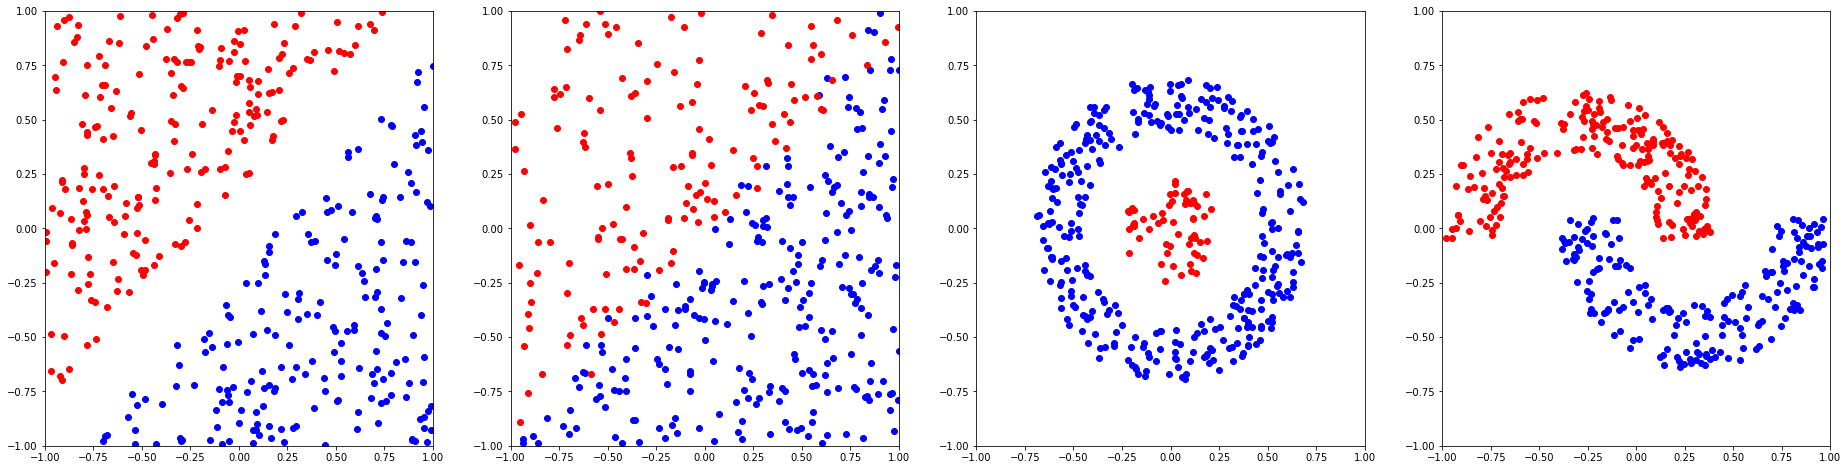

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np

CWID, CHEI = 2, 2
n, d = 400, 2

X,Y = [], []
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if posY >= posX + 0.2 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif posY <= posX - 0.2 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if posY >= posX - 0.1 and np.random.uniform(0,1) < 0.5 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif posY <= posX + 0.1 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if math.sqrt(posX**2+posY**2) < 0.25 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif math.sqrt(posX**2+posY**2) > 0.45 and math.sqrt(posX**2+posY**2) < 0.7 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if math.sqrt((posX+0.3)**2+(posY+0.05)**2)<0.7  and math.sqrt((posX+0.3)**2+(posY+0.05)**2)>0.4 and posY>-0.05 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif math.sqrt((posX-0.3)**2+(posY-0.05)**2)<0.7 and math.sqrt((posX-0.3)**2+(posY-0.05)**2)>0.4 and posY<0.05 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)


# plot
plt.figure(figsize=(32,8))
for k in range(4) :
    xi, yi = X[k], Y[k]    # get data set #i
    x0 = [ xi[i] for i in range(n) if yi[i] == 0 ]    # split 2 groups
    x1 = [ xi[i] for i in range(n) if yi[i] == 1 ]
    x0 = [ [ x0[j][i] for j in range(len(x0)) ] for i in range(d) ]    # transverse, make dimension first
    x1 = [ [ x1[j][i] for j in range(len(x1)) ] for i in range(d) ]
    
    plt.subplot(1,4,k+1)
    plt.ylim([-CWID/2,CWID/2])
    plt.xlim([-CWID/2,CWID/2])
    plt.scatter(x0[0], x0[1], color='blue')
    plt.scatter(x1[0], x1[1], color='red')

In [19]:
from libsvm.svmutil import *

sp = math.floor(n*3/4)
tList = [0, 0, 2, 1]
plt.figure(figsize=(32,8))
for i in range(4) :
    trainX, trainY = X[i][:sp], Y[i][:sp]
    testX, testY = X[i][sp:], Y[i][sp:]
    # Construct a problem
    prob = svm_problem(trainY, trainX)
    # Set parameters: using diff kernels
    param = svm_parameter('-t '+str(tList[i])+' -c 4 -b 1')
    m = svm_train(prob, param)
    _, acc, _ = svm_predict(testY, testX, m)
    # Visualizing separating hyperplane
    RESOL = 500
    tAxis = np.linspace(-1, 1, RESOL)
    tX = np.meshgrid(tAxis, tAxis)
    tY = svm_predict(m, tX)
    plt.pcolormesh(tX[0], tX[1], tY)
    plt.subplot(1,4,k+1)
    plt.ylim([-CWID/2,CWID/2])
    plt.xlim([-CWID/2,CWID/2])
    plt.scatter(x0[0], x0[1], color='blue')
    plt.scatter(x1[0], x1[1], color='red')
    #print(acc)

Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (100/100) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 97% (97/100) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (100/100) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 86% (86/100) (classification)
